In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,036 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155013 files and d

In [153]:
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/result.csv')

df1

,title,content
0,안 입는 옷 나눔! 초성퀴즈 정답자 선착순(별 거 없어요),['모든 게시물은 사진 + 글 첨부 필수 & 질문글 삭제시 활동정지... 더보기\n...
1,눕씨둡씨,['노스페이스 눕시 700\n\n\n\n\n\n\n\n\n\n\n\n눕씨둡씨\n\n...
2,90s 스투시 구매했습니다,['보자마자 반했습니다..🌝재난지원금 알차게 썼네요 굳굳굳 b']
3,오만원의 행복 ..,['프로스케잇로우 일할때 신을려고 구매했구 리바이스는 신기해서 구매해봤어용..3.5...
4,Ymclky 개파카?,['모든 게시물은 사진 + 글 첨부 필수 & 질문글 삭제시 활동정지... 더보기\n...
...,...,...
861,트렌치코트 복원 수선 가능한 곳 아시나요??,['※글 작성시 위 배너를 삭제하시면 활동 제제 & 글 무통보 삭제 대상이오니 유의...
862,핏 괜찮나요?,['※글 작성시 위 배너를 삭제하시면 활동 제제 & 글 무통보 삭제 대상이오니 유의...
863,신발포인트 코디(조셉트 내추럴),['※글 작성시 위 배너를 삭제하시면 활동 제제 & 글 무통보 삭제 대상이오니 유의...
864,캠퍼스 근본룩,['※글 작성시 위 배너를 삭제하시면 활동 제제 & 글 무통보 삭제 대상이오니 유의...


In [3]:
!pip install konlpy wordcloud

     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 448 kB 33.7 MB/s 
     |████████████████████████████████| 86 kB 5.8 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [154]:
from konlpy.tag import Okt
from collections import Counter

In [155]:
new_data = pd.DataFrame(df1, columns = ['title', 'content'])

In [156]:
new_data

,title,content
0,안 입는 옷 나눔! 초성퀴즈 정답자 선착순(별 거 없어요),['모든 게시물은 사진 + 글 첨부 필수 & 질문글 삭제시 활동정지... 더보기\n...
1,눕씨둡씨,['노스페이스 눕시 700\n\n\n\n\n\n\n\n\n\n\n\n눕씨둡씨\n\n...
2,90s 스투시 구매했습니다,['보자마자 반했습니다..🌝재난지원금 알차게 썼네요 굳굳굳 b']
3,오만원의 행복 ..,['프로스케잇로우 일할때 신을려고 구매했구 리바이스는 신기해서 구매해봤어용..3.5...
4,Ymclky 개파카?,['모든 게시물은 사진 + 글 첨부 필수 & 질문글 삭제시 활동정지... 더보기\n...
...,...,...
861,트렌치코트 복원 수선 가능한 곳 아시나요??,['※글 작성시 위 배너를 삭제하시면 활동 제제 & 글 무통보 삭제 대상이오니 유의...
862,핏 괜찮나요?,['※글 작성시 위 배너를 삭제하시면 활동 제제 & 글 무통보 삭제 대상이오니 유의...
863,신발포인트 코디(조셉트 내추럴),['※글 작성시 위 배너를 삭제하시면 활동 제제 & 글 무통보 삭제 대상이오니 유의...
864,캠퍼스 근본룩,['※글 작성시 위 배너를 삭제하시면 활동 제제 & 글 무통보 삭제 대상이오니 유의...


In [157]:
text_data = []
nlp = Okt()

for i in range(len(new_data.index)):
    for j in range(len(new_data.columns)):
        row_text = nlp.nouns(new_data.iloc[i, j])
        for m in range(len(row_text)):
            if len(row_text[m])>=2:
                text_data.append(row_text[m])

In [158]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = "모든 게시 사진 첨부 필수 질문 삭제 활동 정지 보기 더보기 짱구 대디 카페 체험 체험단 브랜드 진행 비용 제품 제공 진행 이벤트 패션 게시판 게시 이용 관련 사진 의무 작성 배너 활동 제제 제재 통보 무통보 대상 유의 해당 생방송 컨텐츠 사용 착장 기본 양식 데일리룩 공지 쇼핑 후기 실사 실사용 후기 누락 경우 참고 이용 사용 양식 아우터 의무 협찬 키 몸무게 체험 후기 보기 생각 필수 구매 카페 제품 작성 배너 일리 혹시 기타 동영상 링크 투표 팔로워 팔로잉 필독 피드백 선택 고아 매뉴얼 정도 정말 조금 회원 용도 그냥 마음 부분 사람 사실 최근 추천 커피 하나 한번 가요 가장 대한 이번"

result = []
for w in text_data:
    if w not in stop_words:
        result.append(w)

In [159]:
for i in range(len(result)):
    if result[i] == '빈티':
        result[i] = '빈티지'
    if result[i] == '다드':
        result[i] = '무신사스탠다드'
    if result[i] == '더원':
        result[i] = '오버더원'
    if result[i] == '레이저':
        result[i] = '블레이저'
    if result[i] == '페이':
        result[i] = '페이탈리즘'
    if result[i] == '보고':
        result[i] = '착용해보고'
    if result[i] == '델리':
        result[i] = '데일리'
    if result[i] == '드하':
        result[i] = '이든메이드'
    if result[i] == '로드':
        result[i] = '86로드'
    if result[i] == '리즘':
        result[i] = '플레이버리즘'
    if result[i] == '브릿지':
        result[i] = '유니폼브릿지'
    if result[i] == '주얼':
        result[i] = '캐주얼'
    if result[i] == '투시':
        result[i] = '나이키스투시'
    if result[i] == '무탠':
        result[i] = '무신사스탠다드'
    if result[i] == '리지':
        result[i] = '리지드'
    if result[i] == '시장':
        result[i] = '리셀'
    if result[i] == '확인':
        result[i] = '정품'
    if result[i] == '판별':
        result[i] = '정품'
    if result[i] == '오버':
        result[i] = '오버더원'
    if result[i] == '착용':
        result[i] = '착용해보고'

result

['나눔',
 '초성퀴즈',
 '정답',
 '선착순',
 '사이즈',
 '슬로우',
 '마이',
 '영화',
 '사이즈',
 '아르미',
 '추리',
 '구제',
 '영화',
 '사이즈',
 '추정',
 '바지',
 '리퀴',
 '시가',
 '엉덩이',
 '노래',
 '사이즈',
 '여름',
 '특징',
 '흐물거리',
 '푸딩',
 '흐물거림',
 '영화',
 '사이즈',
 '블로워',
 '라이더',
 '재킷',
 '컴퍼니',
 '그룹',
 '포함',
 '거의',
 '어깨',
 '변색',
 '이건',
 '가치',
 '나름',
 '고가',
 '애니',
 '사이즈',
 '인터넷',
 '쇼핑몰',
 '바지',
 '네이비',
 '청록',
 '색감',
 '뭔가',
 '기분',
 '영화',
 '더블',
 '셋업',
 '사이즈',
 '결혼식',
 '살이',
 '업계',
 '도태',
 '나눔',
 '영화',
 '바지',
 '세트',
 '허리',
 '브라운',
 '골덴바',
 '이건',
 '끼리',
 '식구',
 '매우',
 '것임',
 '영화',
 '경제',
 '여유',
 '학생',
 '신분',
 '위주',
 '댓글',
 '정답',
 '명당',
 '가지',
 '선착순',
 '택배',
 '추석',
 '발송',
 '불입',
 '학생',
 '라면',
 '학생증',
 '인증',
 '학생증',
 '인증',
 '학생',
 '우선',
 '위로',
 '이해',
 '학생',
 '마감',
 '개인',
 '쪽지',
 '노스페이스',
 '파워',
 '사이즈',
 '작년',
 '겨울',
 '장만',
 '번장',
 '국내',
 '구형',
 '구제',
 '우연',
 '기회',
 '장만',
 '상태',
 '아주',
 '아래',
 '바지',
 '블랭',
 '크룸',
 '스웻',
 '팬츠',
 '블랙',
 '사이즈',
 '나이키스투시',
 '재난',
 '원금',
 '오만원',
 '행복',
 '프로',
 '스케',
 '로우',
 '리바이스',
 '접때',
 '리바이스',
 '반바지',
 '구제',
 '만원

In [160]:
a = 0
for k in range(len(result)):
    if result[k] == '환경':
        a = a + 1
print(a)

32


In [167]:
word = dict(Counter(result).most_common(70))

[word.pop(key, None) for key in ['개인', '거의', '구경', '다시', '때문', '바로', '부산', '시간', '시작', '아시', '여행', '오늘', '요즘', '위해', '이제', '일상', '자신', '자주', '지금', '처음', '친구', '판매', '혼자', '역시', '날씨', '데일리', '역시', '진짜', '여름', '가을', '다른']]

word

{'가격': 144,
 '가방': 85,
 '가죽': 49,
 '고민': 85,
 '구입': 49,
 '구제': 827,
 '기장': 47,
 '나이키': 171,
 '뉴발': 45,
 '뉴발란스': 55,
 '느낌': 154,
 '니트': 66,
 '데님': 91,
 '동묘': 68,
 '디자인': 59,
 '리바이스': 158,
 '리셀': 66,
 '매장': 69,
 '모자': 76,
 '무신사스탠다드': 106,
 '바지': 172,
 '반스': 50,
 '버스': 112,
 '블랙': 74,
 '빈티지': 275,
 '사이즈': 161,
 '상의': 696,
 '상태': 58,
 '색상': 47,
 '셔츠': 150,
 '스타일': 87,
 '신발': 807,
 '안경': 55,
 '오버더원': 99,
 '유니클로': 100,
 '인스타': 52,
 '일본': 82,
 '자켓': 199,
 '정품': 196,
 '조던': 44,
 '착용해보고': 176,
 '청바지': 57,
 '커버': 43,
 '코디': 86,
 '코로나': 45,
 '코트': 100,
 '파카': 61,
 '팬츠': 79,
 '포인트': 57,
 '폴로': 143,
 '하의': 425}

In [168]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [163]:
plt.rc('font', family='NanumBarunGothic') 

font='/content/NanumBarunGothic.ttf'



In [169]:
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(200,313),np.random.randint(26,32),np.random.randint(45,80)))

wc = WordCloud(font_path= font, background_color='white', width=1000, height=1000, color_func=color_func).generate(' '.join(word))
' '.join(word)

'구제 신발 상의 하의 빈티지 자켓 정품 착용해보고 바지 나이키 사이즈 리바이스 느낌 셔츠 가격 폴로 버스 무신사스탠다드 유니클로 코트 오버더원 데님 스타일 코디 고민 가방 일본 팬츠 모자 블랙 매장 동묘 니트 리셀 파카 디자인 상태 청바지 포인트 뉴발란스 안경 인스타 반스 구입 가죽 기장 색상 코로나 뉴발 조던 커버'

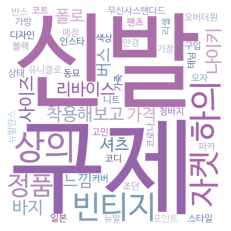

<Figure size 1440x1440 with 0 Axes>

In [170]:
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize = (20, 20))
plt.show()